decision tree

In [41]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print("decision tree classifier")
print("accurcy of decisrion tree training set: {:.2f}".format(clf.score(X_train,y_train)))
print("accurcy of decisrion tree test  set: {:.2f}".format(clf.score(X_test,y_test)))

decision tree classifier
accurcy of decisrion tree training set: 1.00
accurcy of decisrion tree test  set: 0.97


setting max depth decision tree to avoid overfittingm

In [16]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)#setting max depth is calklingb pre pruning

print("decision tree classifier2")
print("accurcy of decisrion tree training set: {:.2f}".format(clf2.score(X_train,y_train)))
print("accurcy of decisrion tree test  set: {:.2f}".format(clf2.score(X_test,y_test)))

decision tree classifier2
accurcy of decisrion tree training set: 0.98
accurcy of decisrion tree test  set: 0.97


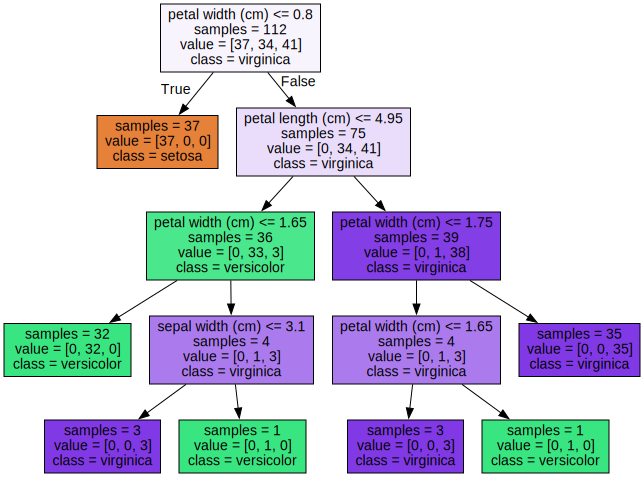

In [19]:
plot_decision_tree(clf,iris.feature_names,iris.target_names)

#### pre pruned version max depth 3

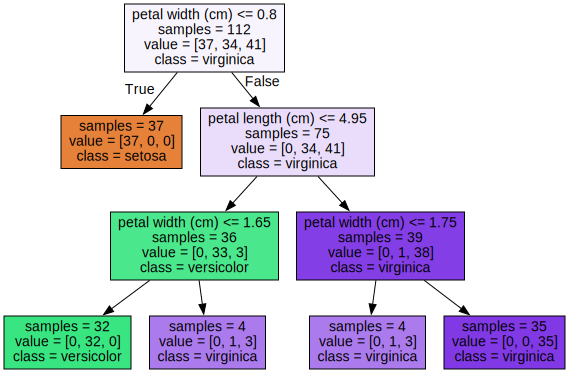

In [29]:
plot_decision_tree(clf2,iris.feature_names,iris.target_names)

features importances

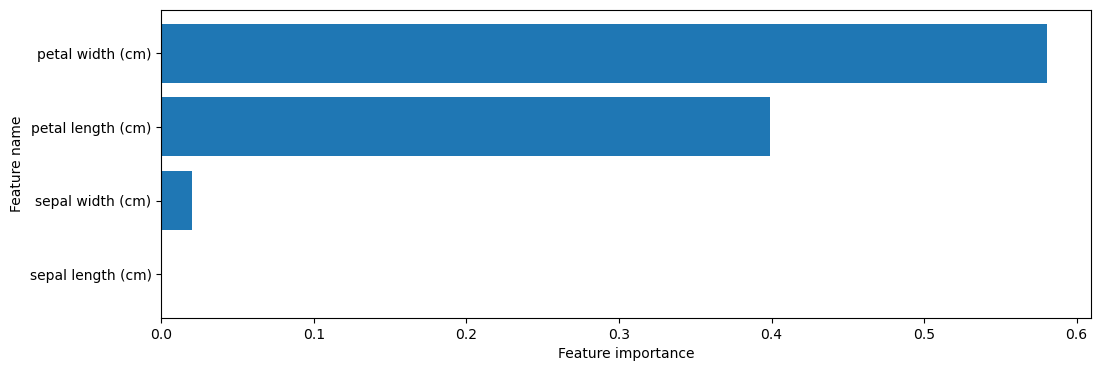

feature_importances:[0.         0.02014872 0.39927524 0.58057605]


In [28]:
from adspy_shared_utilities import plot_feature_importances
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plot_feature_importances(clf,iris.feature_names)
plt.show()
print("feature_importances:{}".format(clf.feature_importances_));
#print('Feature importances: {}'.format(clf.feature_importances_))

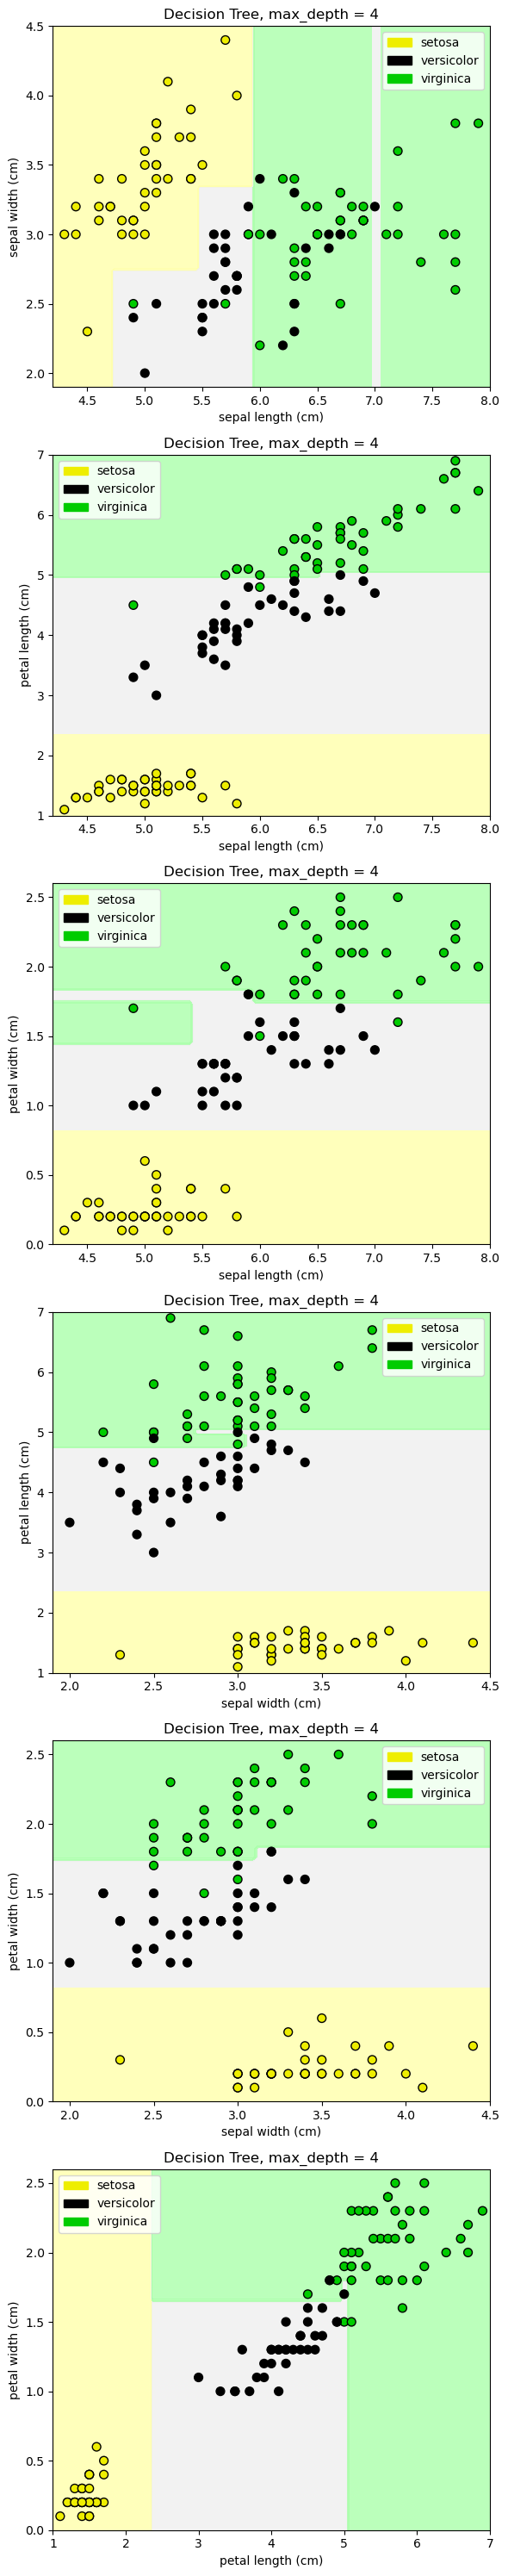

In [36]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

fig, subaxes = plt.subplots(6,1,figsize=(6,30))
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
#pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list,subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X,y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf,X,y,None,None,title,axis,iris.target_names)
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

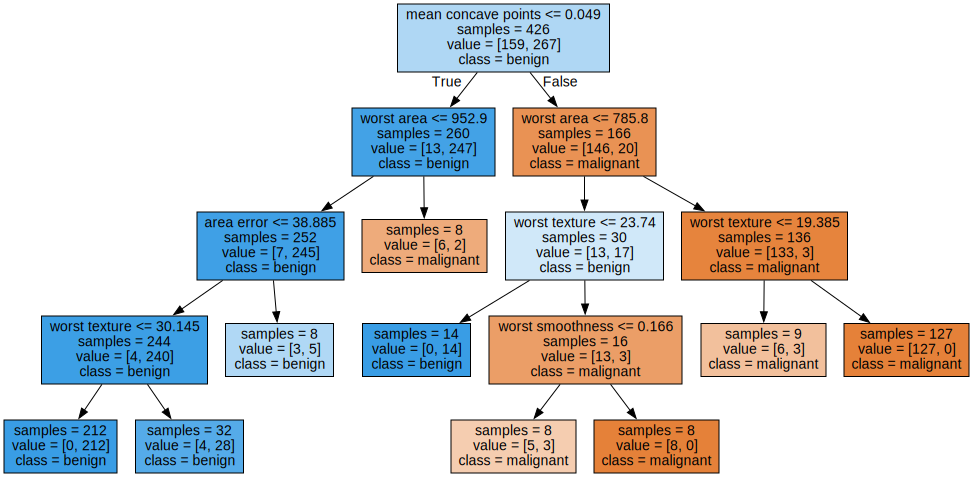

In [42]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


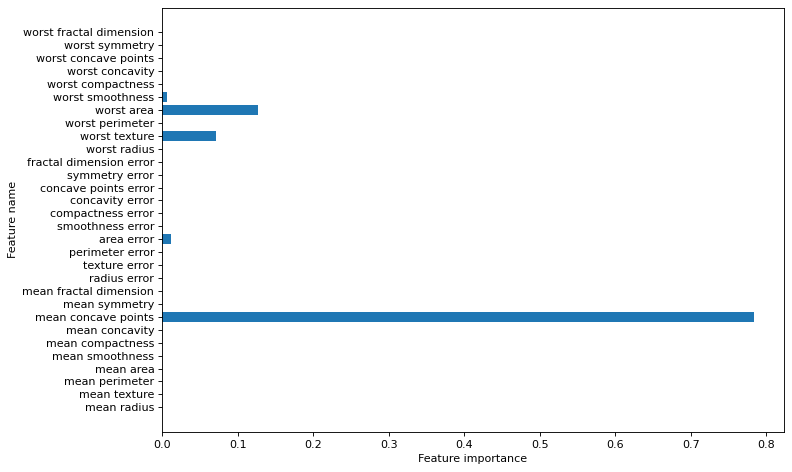

In [43]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()